In [176]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [177]:
import pandas as pd
import re
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
df=pd.read_csv('/content/gurgaon_properties_cleaned_data (1)')

In [178]:
## shape
df.shape

(3843, 17)

In [179]:
## top 5 rows
df.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1.0,Not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']"
1,flat,Apna Enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1.0,Not available,1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2,flat,Tulsiani Easy in Homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3.0,Not available,12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', 'Rajiv Chowk', 'IGI Airport

In [180]:
## focus area
## areaWithType		additionalRoom		agePossession	nearbyLocations	furnishDetails	features

##`areaWithType`

In [181]:
df[['price','Area','areaWithType']].sample(5)

,price,Area,areaWithType
233,1.00,1485.001485,Super Built up area 1485(137.96 sq.m.)
3611,0.75,1095.050000,Plot area 1095(101.73 sq.m.)
1480,1.40,1447.028424,Super Built up area 1720(159.79 sq.m.)Carpet area: 1447 sq.ft. (134.43 sq.m.)
1845,4.50,3154.131913,Super Built up area 3154(293.02 sq.m.)
546,0.80,1654.259719,Super Built up area 1654(153.66 sq.m.)Built Up area: 1472 sq.ft. (136.75 sq.m.)Carpet area: 1310 sq.ft. (121.7 sq.m.)


In [182]:
df[df['areaWithType'].str.contains('Super Built up area',na=False)].shape

(1915, 17)

In [183]:
## Extract Super Built up area
# def set_Super_Built_up_area(text):
#   if isinstance(text,str):
#     match=re.search(r"Super Built up area (\d+\.?\d*)",text)
#     if match:
#       return float((match.group(1)))
#   return None

def extract_super_built_up_area(text):
    if pd.isna(text):  # Check for NaN values
        return None
    match = re.search(r"Super Built up area (\d+\.?\d*)", text)
    if match:
        return float(match.group(1))  # Extract and return the numeric value
    return None

In [184]:
df['areaWithType'].apply(extract_super_built_up_area).isna().sum()

1928

In [185]:
df['Super_Built_up_area']=df['areaWithType'].apply(extract_super_built_up_area)

In [186]:
df.sample(10)[['areaWithType','Super_Built_up_area','Area']]

,areaWithType,Super_Built_up_area,Area
3356,Built Up area: 148 (123.75 sq.m.),NaN,1331.990000
544,Super Built up area 1650(153.29 sq.m.)Carpet area: 1155 sq.ft. (107.3 sq.m.),1650.0,1650.165017
480,Super Built up area 3000(278.71 sq.m.)Carpet area: 2700 sq.ft. (250.84 sq.m.),3000.0,3000.000000
1430,Super Built up area 1457(135.36 sq.m.)Carpet area: 849 sq.ft. (78.87 sq.m.),1457.0,1447.236181
2152,Super Built up area 800(74.32 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),800.0,800.000000
2640,Carpet area: 4800 (445.93 sq.m.),NaN,4800.307220
1351,Carpet area: 1975 (183.48 sq.m.),NaN,1975.044563
1138,Carpet area: 489 (45.43 sq.m.),NaN,480.439259
3183,NaN,NaN,NaN
3350,Built Up area: 162 (135.45 sq.m.),NaN,1458.010000


In [187]:
## Extract Built up area
def set_Built_up_area(text):
  if isinstance(text,str):
    match=re.search(r"Built Up area: (\d+\.?\d*)",text)
    if match:
      return float((match.group(1)))
  return None

In [188]:
df['Built_Up_area']=df['areaWithType'].apply(set_Built_up_area)

In [189]:
## Extract Built up area
def set_carpet_area(text):
  if isinstance(text,str):
    match=re.search(r"Carpet area: (\d+\.?\d*)",text)
    if match:
      return float((match.group(1)))
  return None
df['Carpet area']=df['areaWithType'].apply(set_carpet_area)

In [190]:
df.sample(10)[['areaWithType','Area','Built_Up_area','Super_Built_up_area','Carpet area']]

,areaWithType,Area,Built_Up_area,Super_Built_up_area,Carpet area
2673,Built Up area: 1423 (132.2 sq.m.),1425.000000,1423.0,NaN,NaN
97,Super Built up area 1828(169.83 sq.m.),1828.094933,NaN,1828.0,NaN
2216,Carpet area: 1380 (128.21 sq.m.),1380.024150,NaN,NaN,1380.0
2044,Carpet area: 2298 (213.49 sq.m.),2298.022260,NaN,NaN,2298.0
1874,Super Built up area 1692(157.19 sq.m.),1692.047377,NaN,1692.0,NaN
1222,Super Built up area 1990(184.88 sq.m.)Carpet area: 1680 sq.ft. (156.08 sq.m.),1990.257481,NaN,1990.0,1680.0
350,Super Built up area 1500(139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),1300.000000,NaN,1500.0,1300.0
2681,Built Up area: 1361 (126.44 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),1361.007145,1361.0,NaN,1300.0
277,Carpet area: 3844 (357.12 sq.m.),3844.230529,NaN,NaN,3844.0
1341,Carpet area: 2864 (266.07 sq.m.),2864.060470,NaN,NaN,2864.0


In [191]:
## Imp piece of info. to fill nan values
df[~((df['Super_Built_up_area'].isna()) | (df['Built_Up_area'].isna()) | (df['Carpet area'].isna()))].shape

(534, 20)

In [192]:
all_nan_df=df[((df['Super_Built_up_area'].isna()) & (df['Built_Up_area'].isna()) & (df['Carpet area'].isna()))][['price','Property_type','areaWithType','Area','Built_Up_area','Super_Built_up_area','Carpet area']]

In [193]:
all_nan_index=all_nan_df.index

In [194]:
all_nan_index

Index([2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952,
       ...
       3832, 3833, 3834, 3835, 3836, 3837, 3839, 3840, 3841, 3842],
      dtype='int64', length=586)

In [195]:
all_nan_df.head()

,price,Property_type,areaWithType,Area,Built_Up_area,Super_Built_up_area,Carpet area
2943,5.25,house,Plot area 290(242.48 sq.m.),2609.99,NaN,NaN,NaN
2944,2.10,house,Plot area 61(51 sq.m.),549.01,NaN,NaN,NaN
2945,5.00,house,Plot area 129(107.86 sq.m.),1161.01,NaN,NaN,NaN
2946,3.00,house,Plot area 62(51.84 sq.m.),558.00,NaN,NaN,NaN
2947,4.50,house,Plot area 128(107.02 sq.m.),1152.01,NaN,NaN,NaN


In [196]:
df[df['areaWithType'].str.contains('Plot area',na=False)].shape

(682, 20)

In [197]:
## Extract Built up area
def plot_area(text):
  if isinstance(text,str):
    match=re.search(r"Plot area (\d+\.?\d*)",text)
    if match:
      return float((match.group(1)))
  return None

In [198]:
all_nan_df['Built_Up_area']=all_nan_df['areaWithType'].apply(plot_area)

In [199]:
all_nan_df.sample(10)[['areaWithType','Area','Built_Up_area','Super_Built_up_area','Carpet area']]

,areaWithType,Area,Built_Up_area,Super_Built_up_area,Carpet area
3155,Plot area 900(83.61 sq.m.),900.02,900.0,NaN,NaN
3005,NaN,NaN,NaN,NaN,NaN
3120,Plot area 1200(111.48 sq.m.),1200.12,1200.0,NaN,NaN
3361,Plot area 192(160.54 sq.m.),1728.02,192.0,NaN,NaN
3530,Plot area 150(125.42 sq.m.),1350.01,150.0,NaN,NaN
3439,Plot area 120(100.34 sq.m.),1080.00,120.0,NaN,NaN
3293,Plot area 67(56.02 sq.m.),603.00,67.0,NaN,NaN
3292,Plot area 2(1011.71 sq.m.),215517.24,2.0,NaN,NaN
3637,Plot area 418(349.5 sq.m.),3762.01,418.0,NaN,NaN
3644,Plot area 240(200.67 sq.m.),2160.10,240.0,NaN,NaN


In [200]:
def convert_to_sqrt(row):
  if np.isnan((row['Area']) or (row['Built_Up_area'])):
    return row['Built_Up_area']
  else:
    if (row['Area']) / (row['Built_Up_area'])==9.0:
      return row['Built_Up_area']*9
    elif (row['Area']) / (row['Built_Up_area'])==11.0:
      return row['Built_Up_area']*10.7
    else:
      return row['Built_Up_area']

In [201]:
all_nan_df['Built_Up_area']=all_nan_df.apply(convert_to_sqrt,axis=1)

In [202]:
all_nan_df.head()

,price,Property_type,areaWithType,Area,Built_Up_area,Super_Built_up_area,Carpet area
2943,5.25,house,Plot area 290(242.48 sq.m.),2609.99,290.0,NaN,NaN
2944,2.10,house,Plot area 61(51 sq.m.),549.01,61.0,NaN,NaN
2945,5.00,house,Plot area 129(107.86 sq.m.),1161.01,129.0,NaN,NaN
2946,3.00,house,Plot area 62(51.84 sq.m.),558.00,558.0,NaN,NaN
2947,4.50,house,Plot area 128(107.02 sq.m.),1152.01,128.0,NaN,NaN


In [203]:
df[df['price'].isna()][['price','Price_per_sqrt','Area']]

,price,Price_per_sqrt,Area
18,NaN,NaN,NaN
2985,NaN,NaN,NaN
3000,NaN,13622.0,NaN
3001,NaN,13909.0,NaN
3004,NaN,16058.0,NaN
3005,NaN,16058.0,NaN
3006,NaN,13623.0,NaN
3007,NaN,13910.0,NaN
3008,NaN,13910.0,NaN
3009,NaN,12027.0,NaN


In [204]:
## update to original dataframe
df.update(all_nan_df)

In [205]:
df.isna().sum()

,0
Property_type,0
society,486
sector,0
price,58
Price_per_sqrt,26
Area,58
areaWithType,40
bedRoom,40
bathroom,40
balcony,40


In [206]:
df.shape

(3843, 20)

In [207]:
df[df.isna().sum(axis=1) > 15].shape

(9, 20)

In [208]:
df[~(df['price'].isna())].shape

(3785, 20)

In [209]:
df=df[~(df['price'].isna())]

In [210]:
df.isna().sum()

,0
Property_type,0
society,481
sector,0
price,0
Price_per_sqrt,0
Area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


##`additionalRoom`
all unique values - -
Not available,
Study Room,
Servant Room,
Pooja Room,
Others,
Store Room,
nan.

In [211]:
df['additionalRoom'].fillna('Not available',inplace=True)

<ipython-input-211-85f1c4f59263>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additionalRoom'].fillna('Not available',inplace=True)
<ipython-input-211-85f1c4f59263>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['additionalRoom'].fillna('Not available',inplace=True)


In [212]:
df['additionalRoom'].value_counts(dropna=False)

,count
additionalRoom,
Not available,1580
Servant Room,704
Study Room,249
Others,225
Pooja Room,165
Store Room,99
"Study Room,Servant Room",98
"Pooja Room,Servant Room",82
"Pooja Room,Study Room,Servant Room,Store Room",71


In [213]:
columns=['Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others']
for col in columns:
  df[col]=df['additionalRoom'].str.contains(col).astype(int)

In [214]:
df.sample(20)[['additionalRoom','Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others']]

,additionalRoom,Study Room,Servant Room,Store Room,Pooja Room,Others
1542,Servant Room,0,1,0,0,0
1049,"Study Room,Servant Room",1,1,0,0,0
1670,Servant Room,0,1,0,0,0
1493,"Pooja Room,Servant Room",0,1,0,1,0
3381,Not available,0,0,0,0,0
3776,Servant Room,0,1,0,0,0
1960,"Servant Room,Study Room,Pooja Room",1,1,0,1,0
968,"Servant Room,Store Room",0,1,1,0,0
2505,Servant Room,0,1,0,0,0
951,Not available,0,0,0,0,0


In [215]:
df.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1.0,Not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0,0,0,0,0,0
1,flat,Apna Enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1.0,Not available,1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,650.0,0,0,0,0,0
2,flat,Tulsiani Easy in Homes,sohna road,0.40,6722.0,595.060994,Carpet a

##`agePossession`

In [216]:
df['agePossession'].value_counts(dropna=False)

,count
agePossession,
1 to 5 Year Old,1669
5 to 10 Year Old,570
0 to 1 Year Old,527
undefined,331
10+ Year Old,309
Under Construction,89
Within 6 months,70
Within 3 months,26
23-Dec,20


In [217]:
def cleaning_agePossession(value):
  if pd.isna(value):
    return 'undefined'
  if 'Within 6 months' in value or 'Within 3 months' in value or '0 to 1 Year Old' in value:
    return 'New Property'
  if '1 to 5 Year Old' in value:
    return 'Relatively New Property'
  if  '5 to 10 Year Old' in value:
    return 'Moderately Old'
  if '10+ Year Old' in value:
    return 'Old Property'
  if 'Under Construction' in value or 'By' in value:
    return 'Under Construction'
  try:
    int(value.split(' ')[-1])
    return 'Under Construction'
  except:
    return 'undefined'
df['agePossession'].apply(cleaning_agePossession).value_counts()

,count
agePossession,
Relatively New Property,1669
New Property,623
Moderately Old,570
undefined,483
Old Property,309
Under Construction,131


In [218]:
df['agePossession']=df['agePossession'].apply(cleaning_agePossession)

##`furnishDetails`

In [219]:
df[['furnishDetails','features']].sample(5)

,furnishDetails,features
2075,[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Rain Water Harvesting']"
1432,"['3 Fan', '1 Exhaust Fan', '3 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1396,NaN,"['Lift(s)', 'Maintenance Staff']"
1228,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2849,"['4 Fan', '5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [220]:
## Extract furnishing from the furnishDetails column
all_furnishings=[]
for details in df['furnishDetails'].dropna():
  furnishings=details.replace('[','').replace(']','').replace("'","").split(', ')
  all_furnishings.extend(furnishings)
unique_furnishings=list(set(all_furnishings))

## count of each furnishing
def get_furnishing_count(details,furnishing):
  if not isinstance(details,str):
    return 0
  pattern =re.compile(rf"(\d+)\s{furnishing}",re.IGNORECASE)
  match=pattern.search(details)
  if match:
    return int(match.group(1))
  elif furnishing in details:
    return 1
  return 0

# simplifying furnishing by removing No and number in prefix
columns_to_include=[re.sub(r'No|\d+','',furnishing).strip() for furnishing in unique_furnishings]
## all unique furnishing item to deal with
columns_to_include=list(set(columns_to_include))
## to remove the '' empty entry
columns_to_include=[furnishing for furnishing in columns_to_include if furnishing]
## add all above furnishing items as columns with respective count to further classify them as (Furnished, Semi-Furnished, and Unfurnished)
for furnishing in columns_to_include:
  df[furnishing]=df['furnishDetails'].apply(lambda x: get_furnishing_count(x,furnishing))
furnishing_df=df[['furnishDetails']+columns_to_include]

In [221]:
furnishing_df.sample(10)

,furnishDetails,Light,Chimney,Dining Table,Geyser,Wardrobe,AC,Fridge,Fan,Microwave,Stove,Sofa,Water Purifier,Exhaust Fan,Bed,Curtains,Washing Machine,Modular Kitchen,TV
656,"['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",10,1,1,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1
2428,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3209,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2124,"['1 Fan', '1 Exhaust Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3380,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3105,"['7 Wardrobe', '16 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",16,1,1,1,7,1,1,16,1,1,1,1,1,1,1,1,1,1
1012,"['1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '5 AC', '1 Chimney', '1 Modular Kitchen', '6 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Sofa', 'No TV', 'No Water Purifier']",10,1,1,4,6,5,1,1,1,1,1,1,1,1,1,1,1,1
522,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2374,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1508,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1,1,1,1,1,6,1,1,1,1,1,1,1,1,1,1,1,1


In [222]:
furnishing_df.columns

Index(['furnishDetails', 'Light', 'Chimney', 'Dining Table', 'Geyser',
       'Wardrobe', 'AC', 'Fridge', 'Fan', 'Microwave', 'Stove', 'Sofa',
       'Water Purifier', 'Exhaust Fan', 'Bed', 'Curtains', 'Washing Machine',
       'Modular Kitchen', 'TV'],
      dtype='object')

In [223]:
## we can apply clustering to know in how many class we can distinguish all above columns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [224]:
furnishing_df=furnishing_df.drop(columns='furnishDetails')

In [225]:
S=StandardScaler()
data=S.fit_transform(furnishing_df)

In [226]:
wcss=[]
for i in range(1,11):
  k=KMeans(n_clusters=i,init='k-means++',random_state=12)
  k.fit(data)
  wcss.append(k.inertia_)

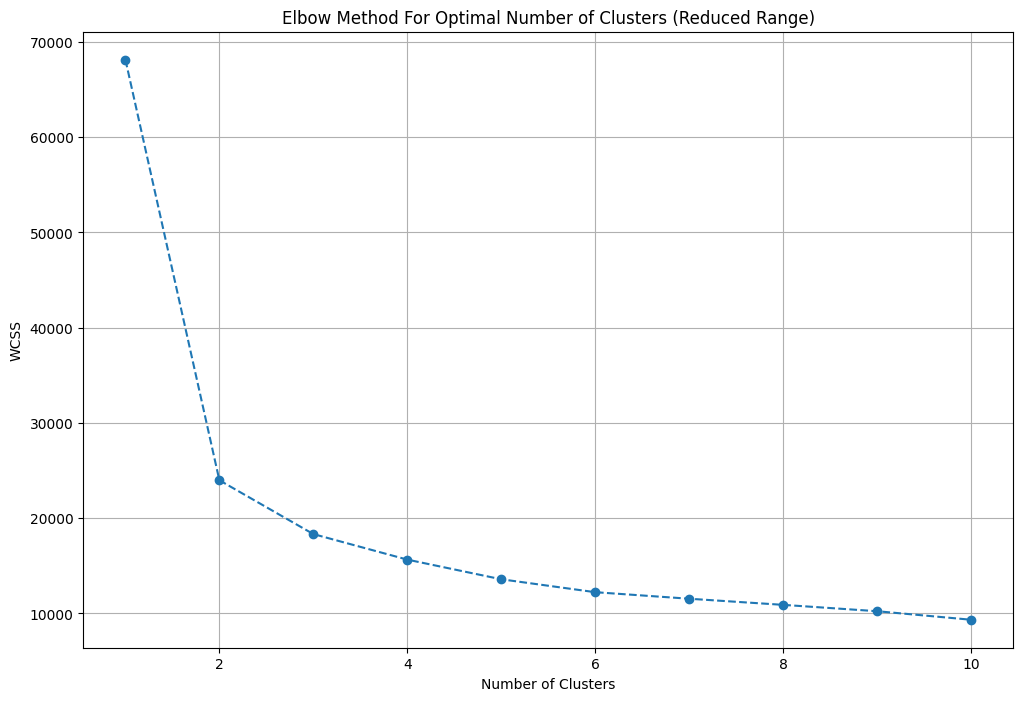

In [227]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [228]:
n_cluster=3
kmean=KMeans(n_clusters=n_cluster,random_state=42)
kmean.fit(data)
cluster_prediction=kmean.predict(data)

In [229]:
df=df.iloc[:,:-18]
df.shape

(3785, 25)

In [230]:
df['furnish_type']=cluster_prediction

In [231]:
df[['furnishDetails','furnish_type']].sample(15)
# 0- unfurnished , 1- semifurnished ,2-furnished

,furnishDetails,furnish_type
1200,"['2 Wardrobe', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2580,NaN,0
2761,[],0
2043,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2255,[],0
1894,"['3 Fan', '2 Geyser', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
687,"['3 Wardrobe', '11 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
786,"['1 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2028,NaN,0
236,NaN,0


#`Features

In [232]:
df['features'].sample(10)

,features
3249,NaN
3654,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
943,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1042,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2236,"['Feng Shui / Vaastu Compliant', 'Lift(s)']"
143,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1521,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1728,"['Intercom Facility', 'Lift(s)', 'No open drainage around', 'Bank Attached Property', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1614,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
3452,NaN


In [233]:
df['features'].value_counts(dropna=False)

,count
features,
NaN,631
"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",290
"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",91
"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",64
"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",45
"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",35
"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",25
"['Intercom Facility', 'Lift(s)', 'Park']",20
"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']",19


In [234]:
df[['society','features']].sample(10)

,society,features
3612,NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Park', 'Visitor Parking', 'Rain Water Harvesting']"
364,Bestech Altura,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2168,AIPL Zen Residences,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
1591,Tulip Ivory,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2867,Breez Global Heights,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
1728,DLF Regal Gardens,"['Intercom Facility', 'Lift(s)', 'No open drainage around', 'Bank Attached Property', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2005,HSIIDC Sidco Aravali,"['Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"
1627,Siddhartha Apartment,"['Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking']"
3385,NaN,NaN
1012,Ambience Creacions,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [235]:
## as there are many nan values in features columns
df['features'].isna().sum()

631

In [236]:
## we can use this data to fetch missing info. of  feature of society
apartment_df=pd.read_csv('/content/real_estate_data - real_estate_data.csv')
apartment_df.head()

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"
3,Sobha City,"2, 3, 4 BHK Apartment in S

In [237]:
df['society']=df['society'].str.lower()

In [238]:
apartment_df['PropertyName']=apartment_df['PropertyName'].str.lower()

In [239]:
temp_df=df[df['features'].isna()]
temp_df.shape

(631, 26)

In [240]:
x=pd.merge(temp_df,apartment_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
x.isna().sum()

479

In [241]:
df.loc[temp_df.index,'features']=x.values
df['features'].isna().sum()

479

In [242]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [243]:
df['features_list']=df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [244]:
mlb=MultiLabelBinarizer()
features_binary_matrix=mlb.fit_transform(df['features_list'])
features_binary_df=pd.DataFrame(features_binary_matrix,columns=mlb.classes_)

In [245]:
features_binary_df.sample(10)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
785,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [246]:
## we can give a luxury score to columns according to above features in features_binary_df
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [247]:
luxury_score_society=features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [248]:
df['luxury_score']=luxury_score_society

In [249]:
df[['society','luxury_score']].sample(10)

,society,luxury_score
2586,gls avenue 51,0.0
2543,m3m soulitude,67.0
2778,ss radiance residency,72.0
2289,mapsko mount ville,16.0
1062,alpha corp gurgaonone,26.0
2259,whiteland the aspen,49.0
2526,supertech araville,22.0
93,central park flower valley aqua front towers,49.0
3163,NaN,0.0
1209,paras dews,165.0


In [251]:
df[df['society']=='gls avenue 51']

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,features_list,luxury_score
133,flat,gls avenue 51,sector 92,0.42,7106.0,591.049817,Carpet area: 591 (54.91 sq.m.),2.0,2.0,1.0,"Pooja Room,Study Room",4.0,East,Relatively New Property,"['Yaduvanshi Shiksha Niketan Sector- 92', 'Aarvy Healthcare Hospital', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']","['1 Fan', '1 Exhaust Fan', '2 Geyser', '1 Light', '1 Modular Kitchen', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",NaN,NaN,591.00,1,0,0,1,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Park, Visitor Parking]",55.0
650,flat,gls avenue 51,sector 92,0.21,6953.0,302.027902,Carpet area: 302 (28.06 sq.m.),1.0,1.0,1.0,Not available,0.0,South-East,Relatively New Property,"['Yaduvanshi Shiksha Niketan Sector- 92', 'Aarvy Healthcare Hospital', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,302.00,0,0,0,0,0,0,"[Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Swimming Pool, Maintenance Staff, Park, Visitor Parking, Shopping Centre, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting]",49.0
1634,flat,gls avenue 51,sector 92,0.39,6077.0,641.764028,Carpet area: 641.74 (59.62 sq.m.),3.0,3.0,3.0,Not available,6.0,North,Relatively New Property,"['Yaduvanshi Shiksha Niketan Sector- 92', 'Aarvy Healthcare Hospital', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,641.74,0,0,0,0,0,0,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, No open drainage around, Visitor Parking, Swimming Pool, Park, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center]",130.0
1904,flat,gls avenue 51,sector 92,0.50,7812.0,640.040963,Super Built up area 640(59.46 sq.m.),3.0,3.0,1.0,Not available,0.0,NaN,Relatively New Property,"['Yaduvanshi Shiksha Niketan Sector- 92', 'Aarvy Healthcare Hospital', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",[],NaN,640.0,NaN,NaN,0,0,0,0,0,0,[],15.0
1911,flat,gls avenue 51,sector 92,0.42,6562.0,640.048766,Carpet area: 640 (59.46 sq.m.),3.0,3.0,1.0,Not available,2.0,NaN,Relatively New Property,"['Yaduvanshi Shiksha Niketan Sector- 92', 'Aarvy Healthcare Hospital', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,640.00,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Park]",65.0
1939,flat,gls avenue 51,sector 92,0.50,7812.0,640.040963,Carpet area: 640 (59.46 sq.m.),3.0,3.0,1.0,Not available,12.0,NaN,New Property,"['Yaduvanshi Shiksha Niketan Sector- 92

In [253]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [254]:
df.shape

(3785, 23)

In [255]:
df.to_csv('gurgaon_properties_cleaned_v2_.csv')